Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [ ]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv',
                 parse_dates=['created'])
assert df.shape == (49352, 34)

df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   bathrooms             49352 non-null  float64       
 1   bedrooms              49352 non-null  int64         
 2   created               49352 non-null  datetime64[ns]
 3   description           47906 non-null  object        
 4   display_address       49217 non-null  object        
 5   latitude              49352 non-null  float64       
 6   longitude             49352 non-null  float64       
 7   price                 49352 non-null  int64         
 8   street_address        49342 non-null  object        
 9   interest_level        49352 non-null  object        
 10  elevator              49352 non-null  int64         
 11  cats_allowed          49352 non-null  int64         
 12  hardwood_floors       49352 non-null  int64         
 13  dogs_allowed    

In [ ]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

## EDA

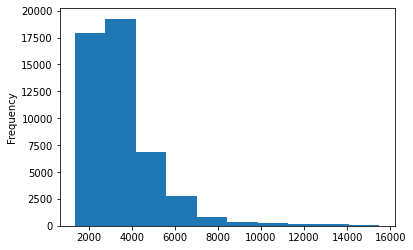

In [ ]:
#Choose a feature, and plot its relationship with the target.
df['price'].plot(kind='hist')

In [ ]:
df.describe()['price']

count    48818.000000
mean      3579.560982
std       1762.420875
min       1375.000000
25%       2500.000000
50%       3150.000000
75%       4095.000000
max      15500.000000
Name: price, dtype: float64

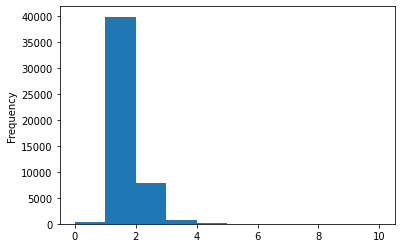

In [ ]:
df['bathrooms'].plot(kind='hist')

In [ ]:
df.describe()['bathrooms']

count    48818.000000
mean         1.201790
std          0.470707
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: bathrooms, dtype: float64

In [ ]:
pd.crosstab(df['price'],df['bathrooms'])

bathrooms,0.0,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,10.0
price,,,,,,,,,,,
1375,0,21,0,0,0,0,0,0,0,0,0
1395,0,20,0,0,0,0,0,0,0,0,0
1400,0,89,0,1,0,0,0,0,0,0,0
1404,0,1,0,0,0,0,0,0,0,0,0
1420,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,1,0,0,5,1,0,0,0
14999,0,0,0,0,0,0,1,0,0,0,0
15000,2,1,0,2,15,35,7,2,3,0,0


## split data

Text(0, 0.5, 'Price')

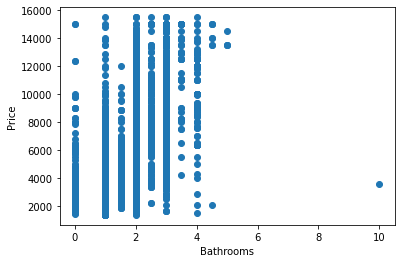

In [ ]:
y = df['price']
X = df[['bathrooms']]

import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel('Bathrooms')
plt.ylabel('Price')


#line of best fit 

## train validation split

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48818 entries, 0 to 49351
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bathrooms  48818 non-null  float64
dtypes: float64(1)
memory usage: 762.8 KB


In [ ]:
X.shape

(48818, 1)

In [ ]:
#create a mask to split data into 20% and 80% data
mask = X.index < (48818*0.2)
mask

array([ True,  True,  True, ..., False, False, False])

In [ ]:
X_train, y_train = X.loc[mask], y.loc[mask]
X_val, y_val = X.loc[~mask], y.loc[~mask]

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(9644, 1)
(39174, 1)
(9644,)
(39174,)


In [ ]:
#creating a baseline
baseline_guess = y_train.mean()
MAE = abs(y_train - baseline_guess).mean()

print(f'''if baseline model always predicts {baseline_guess},
on average, the prediction will be off by {MAE}.''')

if baseline model always predicts 3550.953649937785,
on average, the prediction will be off by 1182.6273153592324.


In [ ]:
#Use scikit-learn for linear regression with one feature.
from sklearn.linear_model import LinearRegression

#instantiate predictor 
lr = LinearRegression()

#train predictor using training data
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#always need the zeroth index of lr.coef bc trained on one feature
lr.coef_[0]

2454.364416941127

In [ ]:
lr.intercept_

612.409608024604

In [ ]:
#Define a function to make new predictions and explain the model coefficient.
#rent price = # of bathrooms * 2454.36 + 612.41
def rent_price(bath):
  rent = bath * lr.coef_[0] + lr.intercept_
  return rent

rent_price(1)

3066.77